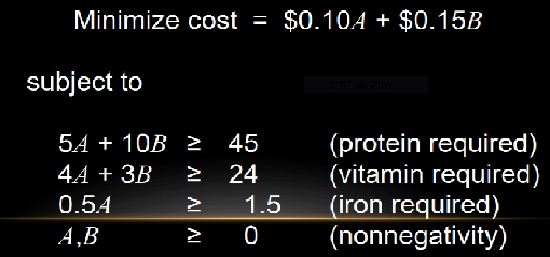

In [63]:
from scipy.optimize import linprog
C = [0.1,0.15]
A = [[-5,-10],[-4,-3]]
b = [-45,-24]
X0_bounds = [3,None]
X1_bounds = [0,None]
res = linprog(C,A,b,bounds=(X0_bounds,X1_bounds))
print(res)

     con: array([], dtype=float64)
     fun: 0.78
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([4.2, 2.4])


宣傳新產品的廣告代理商希望就廣告達到的人數而言，獲得最大的曝光率。該機構將採用兩種方法：集中的互聯網廣告（每次廣告投放預計可吸引200,000人）和印刷媒體（每次廣告投放預計可達到80,000人）。每個Internet突發事件的成本為3,000美元，而每個平面媒體廣告的成本僅為900美元。已經同意，平面媒體廣告的數量將不超過互聯網突發數量的五倍。該機構希望至少發布5個且不超過15個互聯網廣告。廣告預算為$ 75.000鑑於這些限制，最有效的廣告策略是什麼？

In [95]:
import pulp 

prob = LpProblem("Textile", LpMaximize)

# 變數
Eadv = LpVariable("Eadv", lowBound=0, cat='Integer')
adv = LpVariable("adv", lowBound=0, cat='Integer')

# 目標
prob += 200000 * Eadv + 80000 * adv

# 限制
prob += 3000* Eadv + 900 * adv <= 75000
prob += Eadv*5>=adv*1
prob += Eadv*1>=5
prob += Eadv*1<=15


# 解算
prob.writeLP("Textile.lp")
prob.solve()

if prob.status == 1:
    # 解答物件

    for i in prob.variables():
        if i.name == 'Eadv':
            Pants = i
        elif i.name == 'adv':
            Jacket = i

    print ("互聯網廣告=%d\n平面廣告=%d\n$=%.1f" %    
        (Eadv.varValue, adv.varValue,
         value(prob.objective)))

else:
    print ("Fail")

互聯網廣告=10
平面廣告=50
$=6000000.0


In [101]:
import pulp 

prob = LpProblem("Textile", LpMinimize)

# 變數
C_30 = LpVariable("C_30", lowBound=0, cat='Integer')
C_92 = LpVariable("C_92", lowBound=0, cat='Integer')
D_21 = LpVariable("D_21", lowBound=0, cat='Integer')
E_11 = LpVariable("E_11", lowBound=0, cat='Integer')

# 目標
prob += 0.12 * C_30 + 0.09 * C_92 + 0.11 * D_21 + 0.04 * E_11

# 限制
prob += 1 * C_30 >= 50*0.15
prob += 1 * C_30 + 1 * C_92 >= 50*0.45
prob += 1 * D_21 + 1 * E_11 <= 50*0.30
prob += 1 * C_30 + 1 * C_92 + 1 * D_21 + 1 * E_11 >= 50

# 解算
prob.writeLP("Textile.lp")
prob.solve()

if prob.status == 1:
    # 解答物件

    for i in prob.variables():
        if i.name == 'C_30':
            C_30 = i
        elif i.name == 'C_92':
            C_92 = i
        elif i.name == 'D_21':
            D_21 = i
        elif i.name == 'E_11':
            E_11 = i

    print ("【C_30】=%d\n【C_92】=%d\n【D_21】=%d\n【E_11】=%d\n$=%.1f" %    
        (C_30.varValue, C_92.varValue, D_21.varValue, E_11.varValue,
         value(prob.objective)))
else:
    print ("Fail")

【C_30】=8
【C_92】=27
【D_21】=0
【E_11】=15
$=4.0


----------------------------------------------------------------	   
        分析問題     流程圖   寫Code   測試程式
-------------------------------------------------------------------
Hank	  20 小時	  22小時 	 24小時     26小時
-------------------------------------------------------------------
Jack 	   10 小時   12小時   14小時     16小時
-------------------------------------------------------------------
John 	   2  小時	4 小時    6 小時       8小時
-------------------------------------------------------------------
Tomy 	 30 小時	 32小時 	34小時     36小時
-------------------------------------------------------------------

In [10]:
import numpy as np
from scipy.optimize import linear_sum_assignment 
cost = np.array([[20,22,24,26], [10,12,14,16], [2,4,6,8], [30,32,34,36]])

r, c = linear_sum_assignment(cost) # 得到最佳分配下的各值

Hank=str(cost[r,c][0])
Jack=str(cost[r,c][1])
John=str(cost[r,c][2])
Tomy=str(cost[r,c][3])


print("Hank花費成本:",str(cost[r,c][0]),"小時","Jack花費成本:",str(cost[r,c][1]),"小時","John花費成本:",str(cost[r,c][2]),"小時",
     "Tomy花費成本:",str(cost[r,c][3]),"小時")

print("最低總成本：",cost[r, c].sum(),"小時")

Hank花費成本: 26 小時 Jack花費成本: 14 小時 John花費成本: 4 小時 Tomy花費成本: 30 小時
最低總成本： 74 小時


某貨櫃欲盛裝清酒與香菸，每瓶清酒價值 $100，每包菸價值 $90；
每件清酒將對袋子減少可盛重1單位與減少2單位空間，每件香菸為1.5及1；
袋子共可盛重 751 單位，共可佔有 1001 單位;
欲求內容物價值最高值及應裝入多少清酒及香菸？還剩多少耐重和空間？

In [104]:
import pulp 

prob = LpProblem("Textile", LpMaximize)

# 變數
Sake = LpVariable("Sake", lowBound=0, cat='Integer')
cigarette = LpVariable("cigarette", lowBound=0, cat='Integer')

# 目標
prob += 100 * Sake + 90 * cigarette

# 限制
prob += Sake + 1.5 * cigarette <= 751
prob += 2 * Sake + cigarette <= 999

# 解算
prob.writeLP("Textile.lp")
prob.solve()

if prob.status == 1:
    # 解答物件

    for i in prob.variables():
        if i.name == 'Sake':
            Pants = i
        elif i.name == 'cigarette':
            Jacket = i

    print ("Sake=%d\ncigarette=%d\n$=%.1f" %    
        (Pants.varValue, Jacket.varValue,
         value(prob.objective)))

    # 殘餘資源
    Weight = 751 - (Sake.varValue + 1.5 * cigarette.varValue)
    space = 999 - (2 * Sake.varValue + cigarette.varValue)

    print ("Weight=%.2f\nspace=%.1f" % (Weight, space))
else:
    print ("Fail")


Sake=374
cigarette=251
$=59990.0
Weight=0.50
space=0.0
